In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [20]:
#Import and read data
train_path = 'C:/Users/alexandros.peratinos/OneDrive - BearingPoint GmbH/Documents/ML/Data/housing_prices/train.csv'
test_path  = 'C:/Users/alexandros.peratinos/OneDrive - BearingPoint GmbH/Documents/ML/Data/housing_prices/test.csv'
train_data = pd.read_csv(train_path)
test_data  = pd.read_csv(test_path)

#Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data['SalePrice']
train_data.drop('SalePrice', axis=1, inplace=True)

#Select numerical columns only
num_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64','float64']]
X=train_data[num_cols].copy()
X_test = test_data[num_cols].copy()

In [21]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [31]:
#pipeline for preprocessing data and creating model
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print('Average MAE score:', scores.mean())

Average MAE score: 18311.538589041094


In [32]:
#function to evaluate different n_estimators 
def get_score(n_estimators):
    """
    Return the average MAE over 3 CV folds of random forest model
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')
    return scores.mean()

In [53]:
results = dict()
for i in range(50,401,50):
    results[i] = get_score(i)

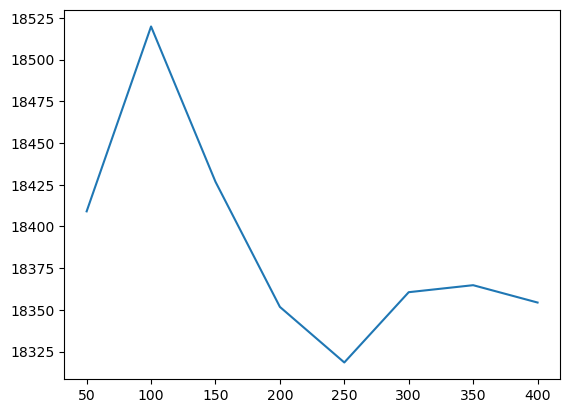

In [61]:
#Visualize results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()